# **Модуль A:** (10 б.)

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Загрузка данных

In [65]:
df = pd.read_csv('data/DatasetExam.csv')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

## 1.2 Предобработка данных

In [67]:
for d in df:
    if np.dtype(df[d]) == 'object':
        print(d, df[d].unique())

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


In [68]:
dummies = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], drop_first=True, dtype=int)
df = pd.DataFrame(data=dummies)
df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,1,0,0,0,0,0,0,1,0,1
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,1,0,0,0,0,0,0,1,0,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,1,0,0,0,0,0,0,1,0,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,1,0,0,0,0,0,0,1,0,1


In [69]:
df.isna().sum().sum()

0

In [70]:
for d in df[['age',	'campaign',	'pdays', 'previous',	'emp.var.rate',	'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]:
    print(d, df[d].unique())

age [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
campaign [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous [0 1 2 3 4 5 6 7]
emp.var.rate [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
cons.conf.idx [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
euribor3m [4.857 4.856 4.855 4.859 

In [71]:
df['contacted'] = np.int64(df['pdays'] != 999)
df['previous'] = np.int64(df['previous'] != 0)
df.drop(['pdays'], axis=1, inplace=True)

df

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes,contacted
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,...,0,0,0,0,0,0,1,0,1,0
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,...,0,0,0,0,0,0,1,0,0,0
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,...,0,0,0,0,0,0,1,0,0,0
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,...,0,0,0,0,0,0,1,0,1,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   previous                       41188 non-null  int64  
 3   emp.var.rate                   41188 non-null  float64
 4   cons.price.idx                 41188 non-null  float64
 5   cons.conf.idx                  41188 non-null  float64
 6   euribor3m                      41188 non-null  float64
 7   nr.employed                    41188 non-null  float64
 8   job_blue-collar                41188 non-null  int64  
 9   job_entrepreneur               41188 non-null  int64  
 10  job_housemaid                  41188 non-null  int64  
 11  job_management                 41188 non-null  int64  
 12  job_retired                    41188 non-null 

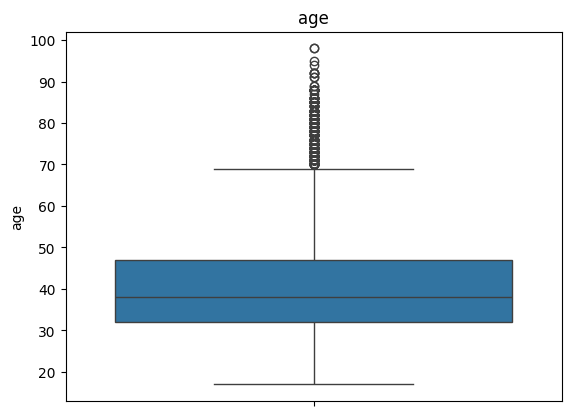

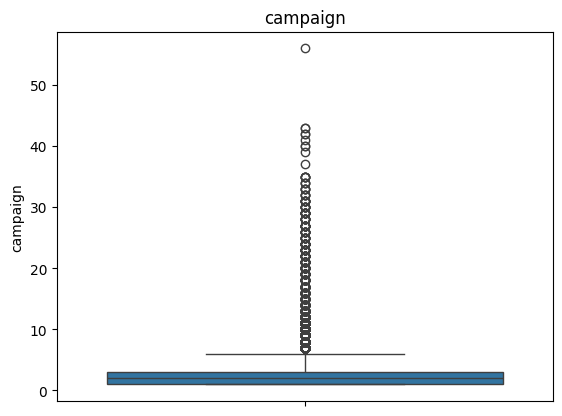

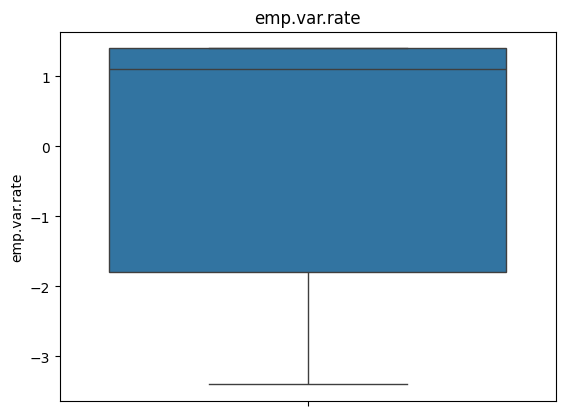

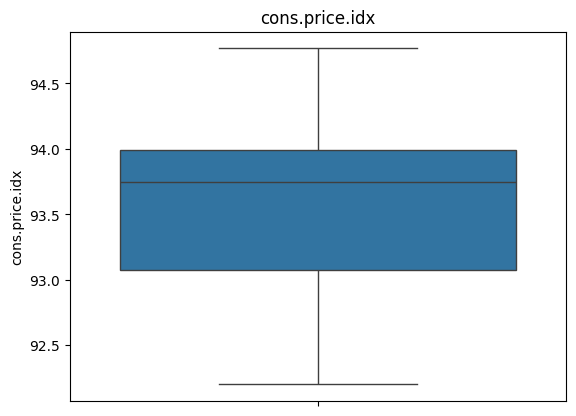

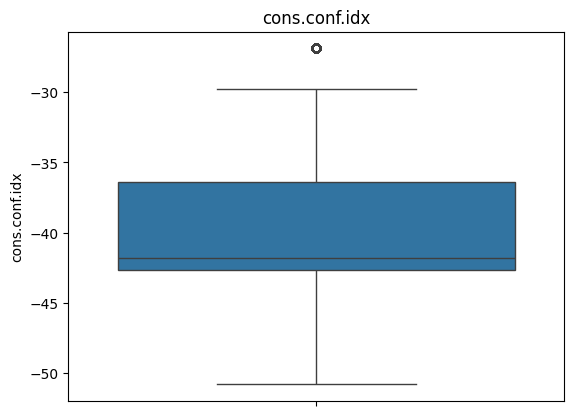

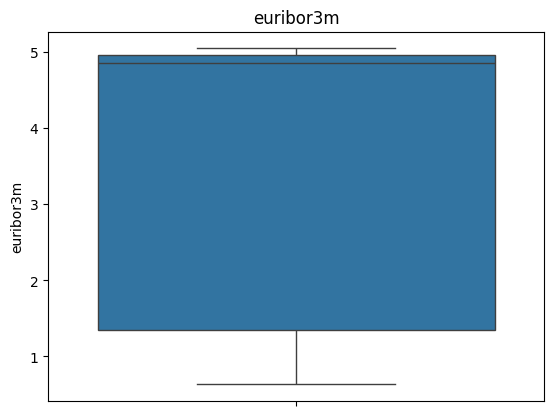

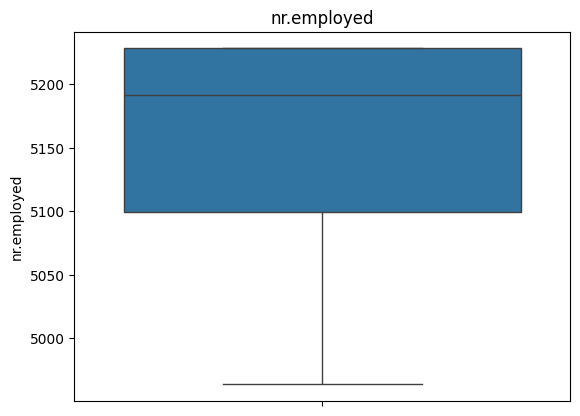

In [73]:
iX = ['age',	'campaign',	'emp.var.rate',	'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for i in iX:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [74]:
out = ['age', 'emp.var.rate', 'cons.conf.idx']

Q1 = df[out].quantile(0.25)
Q3 = df[out].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df[out] = np.clip(df[out], lower, upper, axis=1)

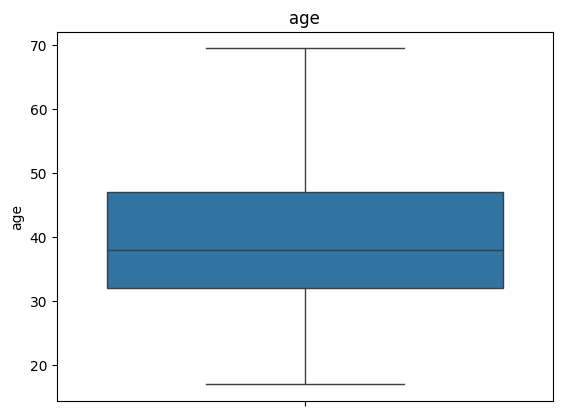

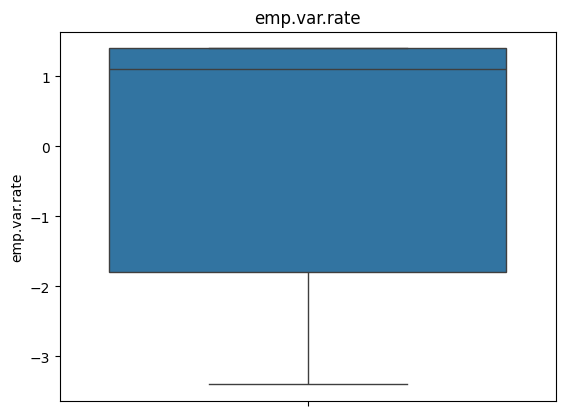

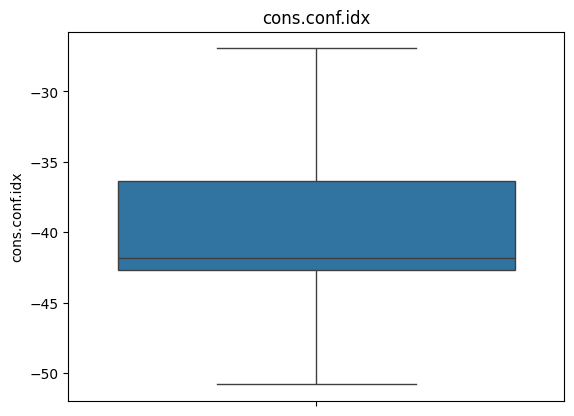

In [75]:
for i in out:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

## 1.3 Разведочный анализ данных

In [76]:
df.describe()[['age',	'campaign',	'emp.var.rate',	'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,39.939485,10.129367,17.000,32.000,38.000,47.000,69.500
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.503143,4.626606,-50.800,-42.700,-41.800,-36.400,-26.950
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


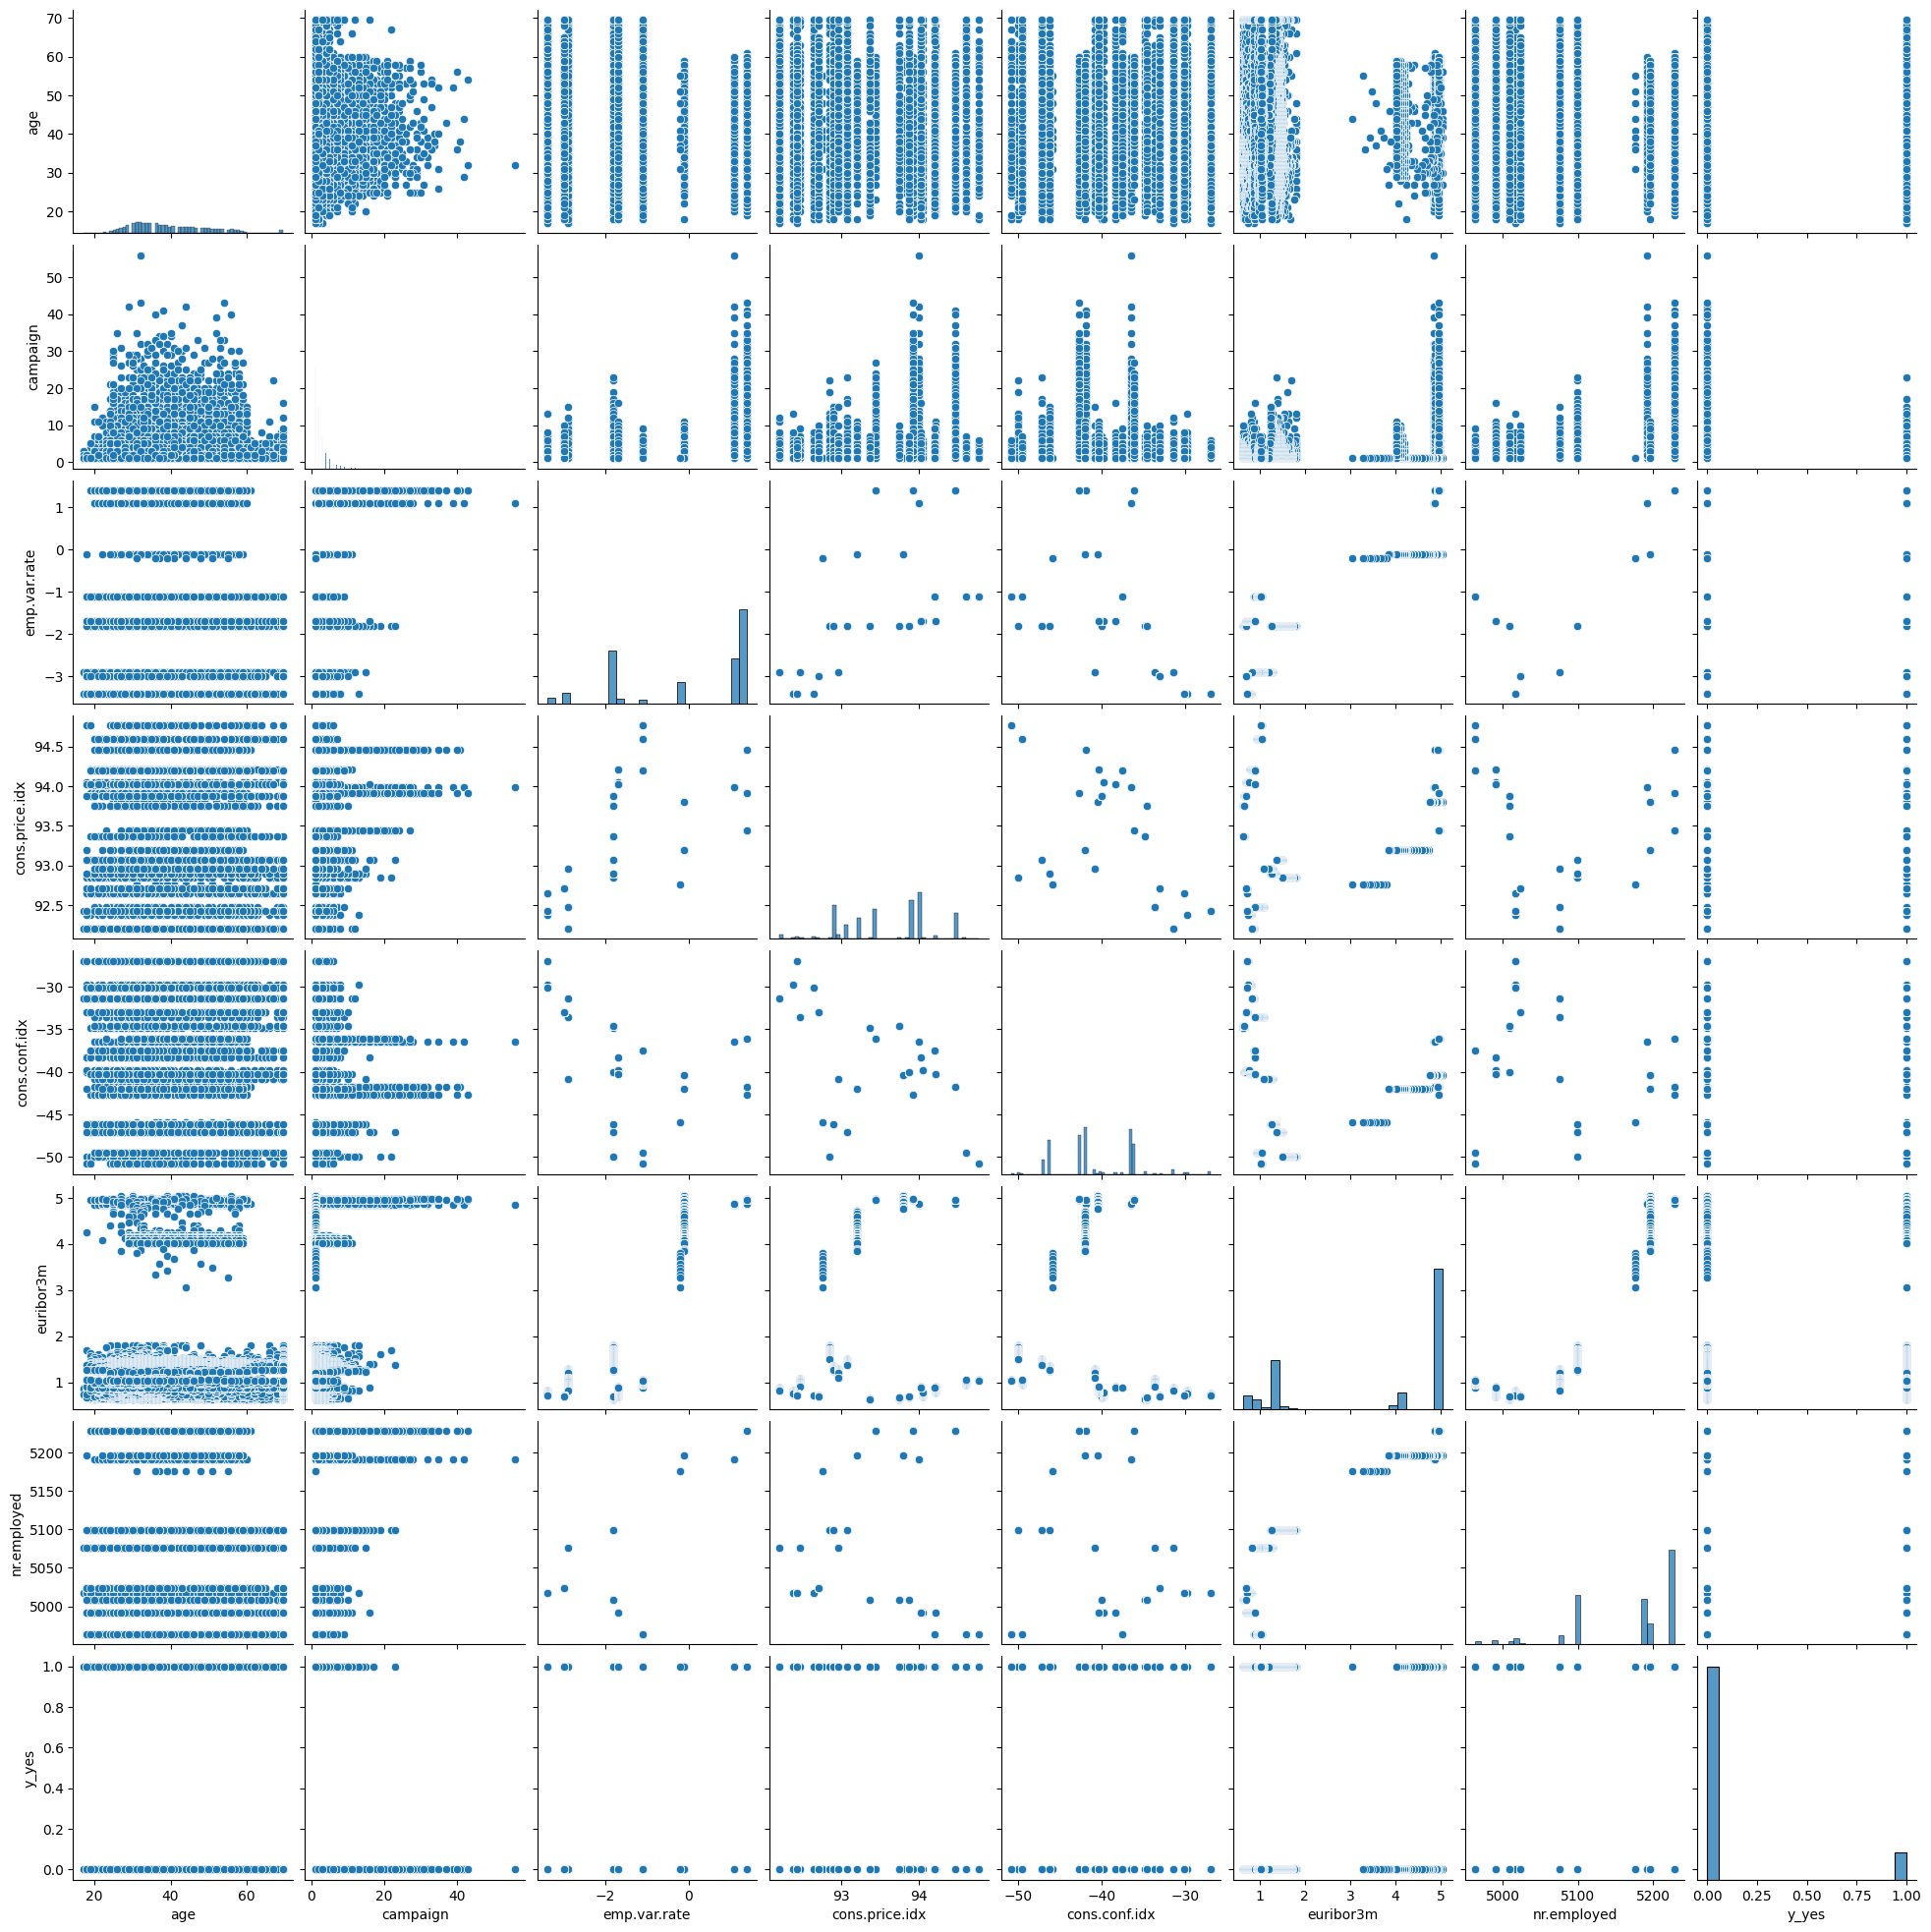

In [77]:
sns.pairplot(df[['age',	'campaign',	'emp.var.rate',	'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_yes']])

<Axes: >

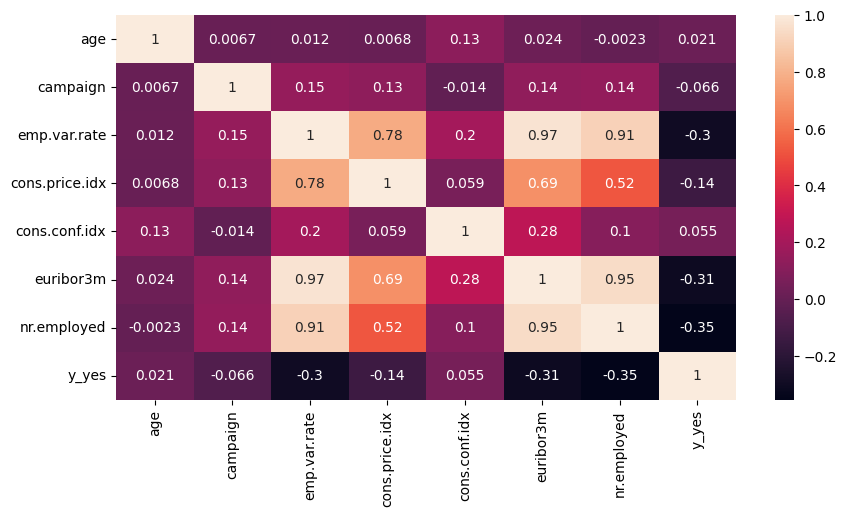

In [78]:
plt.subplots(figsize=(10, 5))
sns.heatmap(df[['age',	'campaign',	'emp.var.rate',	'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_yes']].corr(), annot=True)

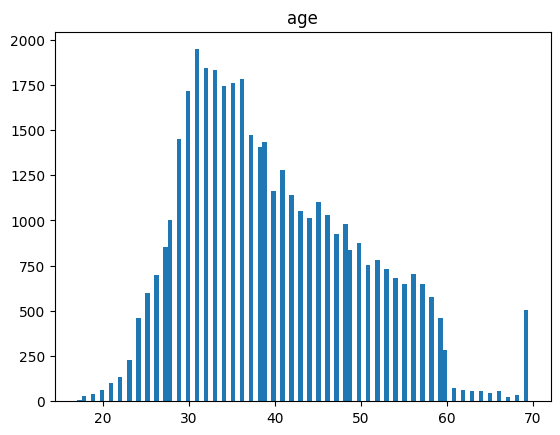

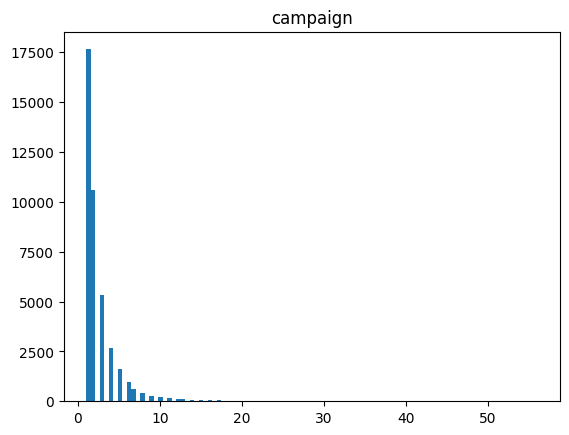

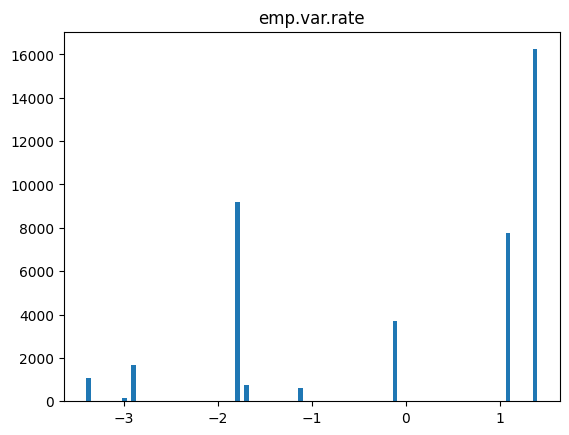

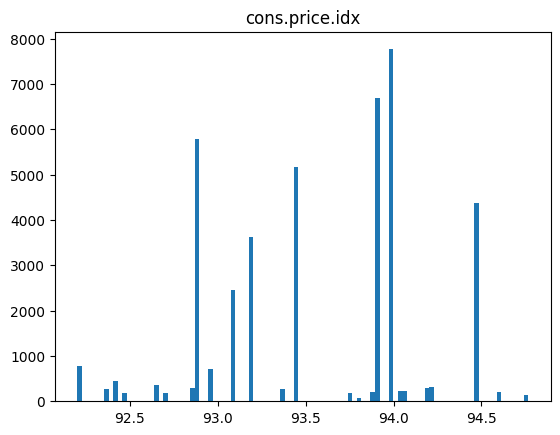

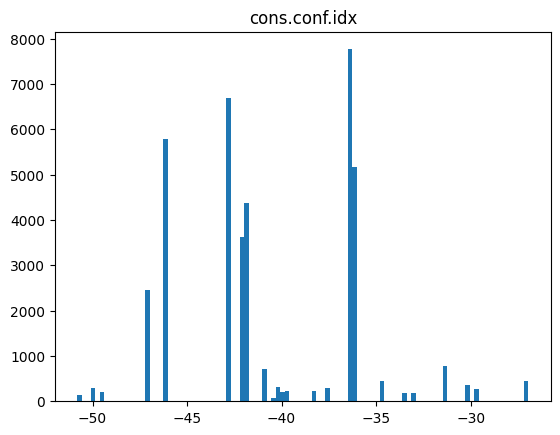

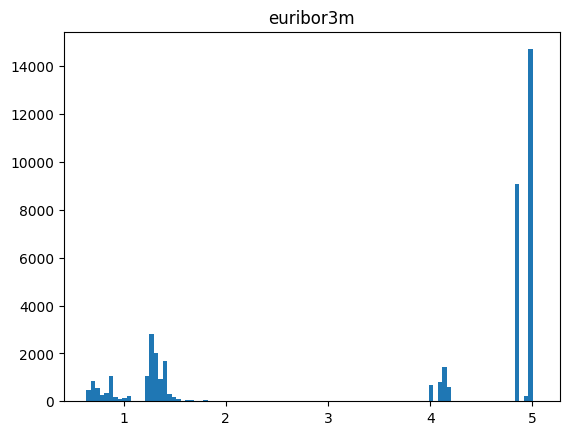

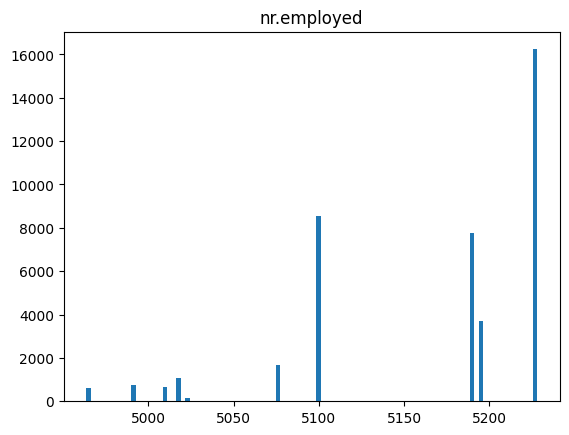

In [101]:
for i in ['age',	'campaign',	'emp.var.rate',	'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']:
    plt.hist(df[i], bins=100)
    plt.title(i)
    plt.show()

## 1.4 Отчет

In [79]:
df.to_csv('data/DatasetExam_upd.csv', index=False)

### 1.1 Загрузка данных
* с помощью `df = pd.read_csv('data/DatasetExam.csv')` загружены данные

### 1.2 Предобработка данных
* Выделены поля, конкатетенирующие в себе несколько значений, либо указывающие диапазон, и разбиты на несколько других
```
dummies = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], drop_first=True, dtype=int)
df = pd.DataFrame(data=dummies)
```
* с помощью `df.isna().sum().sum()` узнаем, что количество пропущенных переменных равно нулю. Следовательно, их обработка не требуется

В результате узнаем, что
* Числовыми признаками являются:
    * 1 - `age`: int64
    * 11 - `campaign`: int64
    * 13 -`previous`: int64
    * 15 -`emp.var.rate `: float64
    * 16 - `cons.price.idx`: float64
    * 17 - `cons.conf.idx`: float64
    * 18 - `euribor3m `: float64
    * 19 -`nr.employed`: float64

* Все остальные признаки - категориальные (содержат 0 и 1)

* Столбцы `age`, `emp.var.rate`, `cons.conf.idx` содержали выбросы, но были удалены путем определения нижнего/верхнего предела нормального диапазона значений

### 1.3 Разведочный анализ данных

В результате узнаем, что
* для признака `y_yes` требуется балансировка

# **Модуль B:**  (14 б.)

In [81]:
import pickle
from pprint import pprint
import warnings

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE
from sklearn.manifold import TSNE, Isomap
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler    
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tensorflow as tf

warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv('data/DatasetExam_upd.csv')
y = df['y_yes']
X = df.drop(['y_yes'], axis=1)

smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def metrics(actual, pred):
  return {
    'Accuracy': accuracy_score(actual, pred),
    'Precision': precision_score(actual, pred),
    'Recall': recall_score(actual, pred),
    'F1-score': f1_score(actual, pred),
    'ROC_AUC': roc_auc_score(actual, pred)
  }
models = {}

In [84]:
def clf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    bag = BaggingClassifier().fit(X_train, y_train)
    predict = bag.predict(X_test)
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    return metrics(y_test, predict)
    
clf(X, y)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7384
           1       0.93      0.91      0.92      7236

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620

[[6905  479]
 [ 650 6586]]


{'Accuracy': 0.9227770177838577,
 'Precision': 0.932200990799717,
 'Recall': 0.910171365395246,
 'F1-score': 0.9210544717152648,
 'ROC_AUC': 0.9226506881147412}

## 2.1 Понижение размерности и отбор признаков

In [88]:
np.var(X)

age                               129.308239
campaign                            5.340574
previous                            0.148680
emp.var.rate                        2.959799
cons.price.idx                      0.398775
cons.conf.idx                      28.355132
euribor3m                           3.568857
nr.employed                      7532.420032
job_blue-collar                     0.132172
job_entrepreneur                    0.020886
job_housemaid                       0.015551
job_management                      0.045070
job_retired                         0.050850
job_self-employed                   0.021109
job_services                        0.059090
job_student                         0.026186
job_technician                      0.105095
job_unemployed                      0.015074
job_unknown                         0.004860
marital_married                     0.248984
marital_single                      0.200328
marital_unknown                     0.001189
education_

In [91]:
vt = VarianceThreshold(1.0)
X_vt = vt.fit_transform(X)

print(X.shape)
print(X_vt.shape)

X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
metric = clf(X_vt, y)
models['VarianceThreshold'] = metric, X_vt.shape
metric

(73096, 52)
(73096, 6)
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7386
           1       0.92      0.88      0.90      7234

    accuracy                           0.90     14620
   macro avg       0.90      0.90      0.90     14620
weighted avg       0.90      0.90      0.90     14620

[[6805  581]
 [ 884 6350]]


{'Accuracy': 0.8997948016415869,
 'Precision': 0.9161737123070264,
 'Recall': 0.8777992811722422,
 'F1-score': 0.8965760677726792,
 'ROC_AUC': 0.8995684735132806}

In [97]:
skb = SelectKBest(k=2)
X_skb = skb.fit_transform(X, y)

print(X.shape)
print(X_skb.shape)

X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
metric = clf(X_skb, y)
models['SelectKBest'] = metric, X_skb.shape
metric

(73096, 52)
(73096, 2)
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7394
           1       0.93      0.81      0.87      7226

    accuracy                           0.88     14620
   macro avg       0.88      0.87      0.88     14620
weighted avg       0.88      0.88      0.88     14620

[[6922  472]
 [1346 5880]]


{'Accuracy': 0.8756497948016416,
 'Precision': 0.9256926952141058,
 'Recall': 0.8137282037088293,
 'F1-score': 0.8661069376933275,
 'ROC_AUC': 0.8749463306886045}

In [98]:
tree = DecisionTreeClassifier().fit(X, y)
rfe = RFE(estimator=tree, n_features_to_select=52, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())

print(X.shape)
print(X_rfe.shape)

clf(X_rfe, y)

(73096, 52)
(73096, 52)
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7396
           1       0.94      0.91      0.92      7224

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620

[[6940  456]
 [ 637 6587]]


{'Accuracy': 0.9252393980848154,
 'Precision': 0.9352548629845236,
 'Recall': 0.9118217054263565,
 'F1-score': 0.923389640428962,
 'ROC_AUC': 0.9250833784027402}

## 2.2 Визуализация

<BarContainer object of 52 artists>

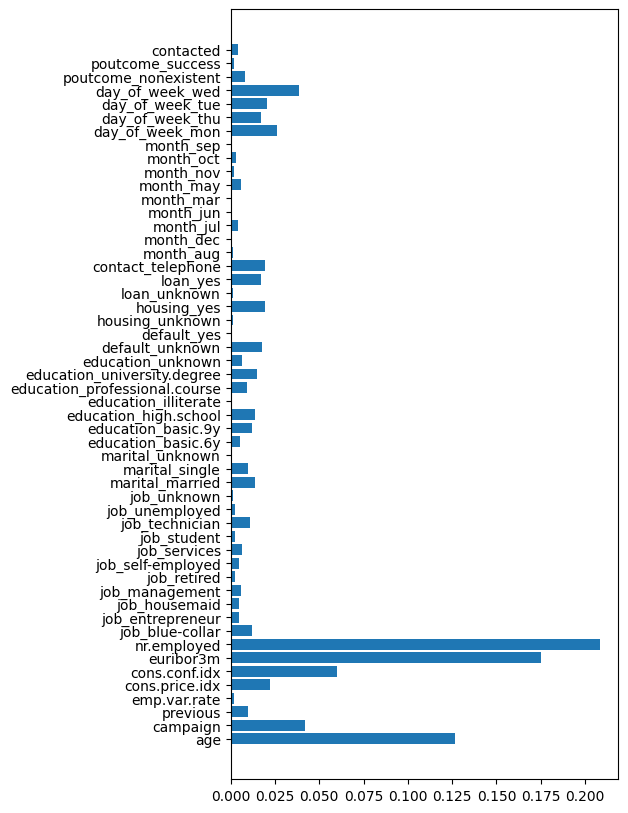

In [102]:
plt.subplots(figsize=(5, 10))
plt.barh(width=tree.feature_importances_, y=X.columns)

## 2.3 Разбиение моделей на обучающую и тестирующую выборки

In [113]:
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_vt, y, test_size=0.2)

In [105]:
parameters = {'n_neighbors': (3, 7, 11, 17)}
optimal = GridSearchCV(KNeighborsClassifier(), parameters).fit(X_train, y_train)
# выводим оптимальные значения параметров
n_neighbors = optimal.best_params_['n_neighbors']
n_neighbors

3

In [106]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

metric = metrics(y_test, y_pred)
models['KNeighborsClassifier'] = metric

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
metric

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      7387
           1       0.87      0.81      0.84      7233

    accuracy                           0.85     14620
   macro avg       0.85      0.85      0.85     14620
weighted avg       0.85      0.85      0.85     14620

[[6513  874]
 [1347 5886]]


{'Accuracy': 0.8480848153214774,
 'Precision': 0.8707100591715976,
 'Recall': 0.8137702198257984,
 'F1-score': 0.8412777817480168,
 'ROC_AUC': 0.8477271296773502}

In [112]:
bag = BaggingClassifier().fit(X_train, y_train)
y_pred = bag.predict(X_test)

metric = metrics(y_test, y_pred)
models['BaggingClassifier'] = metric

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
metric

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7387
           1       0.91      0.88      0.90      7233

    accuracy                           0.90     14620
   macro avg       0.90      0.90      0.90     14620
weighted avg       0.90      0.90      0.90     14620

[[6792  595]
 [ 846 6387]]


{'Accuracy': 0.901436388508892,
 'Precision': 0.9147808650816385,
 'Recall': 0.8830360846121941,
 'F1-score': 0.8986282096377066,
 'ROC_AUC': 0.9012445889420792}

In [114]:
GBC = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = GBC.predict(X_test)

metric = metrics(y_test, y_pred)
models['GradientBoostingClassifier'] = metric

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
metric

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      7387
           1       0.86      0.74      0.80      7233

    accuracy                           0.81     14620
   macro avg       0.82      0.81      0.81     14620
weighted avg       0.82      0.81      0.81     14620

[[6510  877]
 [1868 5365]]


{'Accuracy': 0.8122435020519836,
 'Precision': 0.8595001602050625,
 'Recall': 0.7417392506567123,
 'F1-score': 0.7962894248608534,
 'ROC_AUC': 0.811508585664081}

In [116]:
with open("models/KNeighborsClassifier.pkl", "wb") as f:
    pickle.dump(knn, f)
with open("models/BaggingClassifier.pkl", "wb") as f:
    pickle.dump(bag, f)
with open("models/GradientBoostingClassifier.pkl", "wb") as f:
    pickle.dump(GBC, f)

## 2.4 Аргументированный выбор модели классификации

In [115]:
pprint(models)

{'BaggingClassifier': {'Accuracy': 0.901436388508892,
                       'F1-score': 0.8986282096377066,
                       'Precision': 0.9147808650816385,
                       'ROC_AUC': 0.9012445889420792,
                       'Recall': 0.8830360846121941},
 'DecisionTreeClassifier': {'Accuracy': 0.7147742818057455,
                            'F1-score': 0.7081466965285553,
                            'Precision': 0.7170800850460666,
                            'ROC_AUC': 0.7146143702216486,
                            'Recall': 0.6994331536015485},
 'GaussianNB': {'Accuracy': 0.7147742818057455,
                'F1-score': 0.7081466965285553,
                'Precision': 0.7170800850460666,
                'ROC_AUC': 0.7146143702216486,
                'Recall': 0.6994331536015485},
 'GradientBoostingClassifier': {'Accuracy': 0.8122435020519836,
                                'F1-score': 0.7962894248608534,
                                'Precision': 0.85950016020506

*Очевидно, что лучшей моделью будет `BaggingClassifier`*

## 2.5 Отчет

Узнали, что
* наибольшее влияние имеют признаки `nr.employed`, `euribor3m`, `cons.conf.idx`,  и `age`

# **Модуль C:** Разработка прикладного решения.  (6 б.)

## 3.1 Создание Дэшборда

https://share.streamlit.io/deploy

## 3.2 Отчет

## Структура Web-приложения:
* ### `1_💾_Dataset.py` - Web-страница1 с информацией о наборе данных (чему посвящен датасет (т.е. тематика или предметная область), описание признаков, особенности предобработки данных);
* ### `2_🎓_Models.py` - Web-страница2 с информацией о построенных моделях
* ### `3_🎰_Predict.py` - Web-страница3, с помощью которой можно получить предсказание соответствующей модели ML: реализована загрузка файла в формате *.csv, сделан ввод соответствующих данных с использованием интерактивных компонентов и валидации.

## Модели ML:
* ### `Модель ML1`: бэггинг.
* ### `Модель ML2`: градиентный бустинг.
* ### `Модель ML3`: классическая модель обучения с учителем (KNN).
